In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from prince import PCA as PrincePCA
import umap
from matplotlib import pyplot as plt

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [2]:
def dim_red(mat, p, method):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    if method=='ACP':
        df_embeddings = pd.DataFrame(mat, columns=[f"feature_{i}" for i in range(len(mat[0]))])
        pca = PrincePCA(n_components=p)
        pca = pca.fit(df_embeddings)
        red_mat = pca.transform(df_embeddings).to_numpy()
        
    elif method=='TSNE':
        tsne = TSNE(n_components=3, random_state=42)
        mat = tsne.fit_transform(mat)
        red_mat = mat[:,:p]
        
    elif method=='UMAP':
        mat = umap.UMAP(n_components=p).fit_transform(mat)
        red_mat = mat[:,:p]
        
    elif method=='No_reduction':
        red_mat = mat
        
    else:
        raise Exception("Please select one of the three methods : APC, AFC, UMAP")
    
    return red_mat

In [3]:
def clust(mat, k, initialization='random'):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, init=initialization)
    kmeans.fit(mat)
    pred =  kmeans.labels_
    
    return pred

In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [5]:
methods = ['ACP', 'TSNE', 'UMAP']
for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 20, method)

    # Perform clustering
    
    pred = clust(red_emb, k)

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Print results
    print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Method: ACP
NMI: 0.44 
ARI: 0.25



c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Method: TSNE
NMI: 0.42 
ARI: 0.23

Method: UMAP
NMI: 0.48 
ARI: 0.29



c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Trying different initialisation

In [7]:
import warnings
warnings.filterwarnings('ignore')

methods = ['ACP', 'TSNE', 'UMAP']
nmi_means = []
ari_means = []
for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 20, method)

    results = {'NMI': [], 'ARI':[]}    
    # Perform clustering
    for i in range(10):
        pred = clust(red_emb, k)
        # Evaluate clustering results
        results["NMI"].append(normalized_mutual_info_score(pred, labels))
        results["ARI"].append(adjusted_rand_score(pred, labels))
    results = pd.DataFrame.from_dict(results)
    print("Trying with ", method)
    display(results)
    nmi_means.append(results["NMI"].mean())
    ari_means.append(results["ARI"].mean())
    print(f'NMI mean: {results["NMI"].mean():.2f} NMI std: {results["NMI"].std():.2f}\n')
    print(f'ARI mean: {results["ARI"].mean():.2f} ARI std: {results["ARI"].std():.2f}\n')

Trying with  ACP


,NMI,ARI
0,0.408107,0.240069
1,0.418703,0.247399
2,0.413036,0.243944
3,0.418059,0.247986
4,0.407673,0.237452
5,0.417593,0.249136
6,0.400106,0.233833
7,0.408516,0.233656
8,0.412086,0.244981
9,0.416681,0.244569


NMI mean: 0.41 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  TSNE


,NMI,ARI
0,0.417153,0.231549
1,0.410852,0.233272
2,0.415865,0.242709
3,0.425584,0.254637
4,0.414967,0.237263
5,0.406468,0.228347
6,0.406736,0.222387
7,0.410563,0.233288
8,0.414607,0.238070
9,0.421416,0.248053


NMI mean: 0.41 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  UMAP


,NMI,ARI
0,0.471345,0.272603
1,0.469026,0.292244
2,0.478400,0.295798
3,0.460285,0.267958
4,0.478844,0.294758
5,0.474600,0.283976
6,0.479148,0.286087
7,0.470718,0.279113
8,0.472419,0.284078
9,0.474479,0.272143


NMI mean: 0.47 NMI std: 0.01

ARI mean: 0.28 ARI std: 0.01



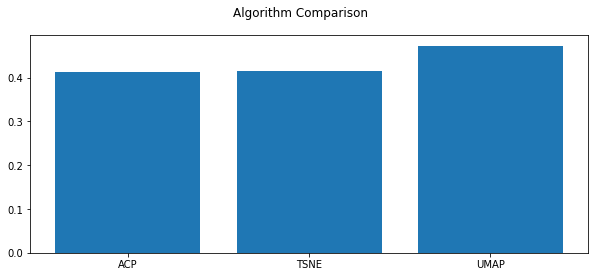

In [8]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(methods, nmi_means)
plt.show()

On remarque qu'on a le meilleur résultat avec la méthode de réduction de dimensionnalité UMAP.

# Comparant les résultats avec kmeans sans réduction de dimensionality

In [9]:
import warnings
warnings.filterwarnings('ignore')

methods = ['No_reduction', 'UMAP']
nmi_means = []
ari_means = []
for method in methods:
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 20, method)

    results = {'NMI': [], 'ARI':[]}    
    # Perform clustering
    for i in range(10):
        pred = clust(red_emb, k)
        # Evaluate clustering results
        results["NMI"].append(normalized_mutual_info_score(pred, labels))
        results["ARI"].append(adjusted_rand_score(pred, labels))
    results = pd.DataFrame.from_dict(results)
    print("Trying with ", method)
    display(results)
    nmi_means.append(results["NMI"].mean())
    ari_means.append(results["ARI"].mean())
    print(f'NMI mean: {results["NMI"].mean():.2f} NMI std: {results["NMI"].std():.2f}\n')
    print(f'ARI mean: {results["ARI"].mean():.2f} ARI std: {results["ARI"].std():.2f}\n')

Trying with  No_reduction


,NMI,ARI
0,0.418064,0.223051
1,0.441471,0.253919
2,0.447660,0.258271
3,0.454990,0.255542
4,0.436150,0.244072
5,0.451500,0.258001
6,0.431276,0.224745
7,0.433205,0.232891
8,0.428085,0.233488
9,0.442024,0.250053


NMI mean: 0.44 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  UMAP


,NMI,ARI
0,0.470598,0.287355
1,0.471829,0.270014
2,0.473293,0.288221
3,0.476813,0.277753
4,0.479381,0.289842
5,0.479582,0.288764
6,0.467278,0.266931
7,0.483374,0.290710
8,0.481264,0.291835
9,0.475808,0.284353


NMI mean: 0.48 NMI std: 0.01

ARI mean: 0.28 ARI std: 0.01



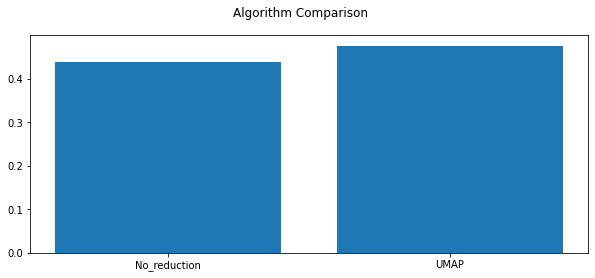

In [10]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(methods, nmi_means)
plt.show()

# Compare different initializations

In [11]:
import warnings
warnings.filterwarnings('ignore')

methods = ['ACP', 'TSNE', 'UMAP']
initializations = ['random', 'k-means++']
nmi_means = {'random': [], 'k-means++':[]}
ari_means = {'random': [], 'k-means++':[]}
results = {}
for initialization in initializations:
    print("Using ", initialization, " initialization")
    for method in methods:
        # Perform dimensionality reduction
        red_emb = dim_red(embeddings, 20, method)

        results[initialization] = {'NMI': [], 'ARI':[]}    
        # Perform clustering
        for i in range(10):
            pred = clust(red_emb, k, initialization=initialization)
            # Evaluate clustering results
            results[initialization]["NMI"].append(normalized_mutual_info_score(pred, labels))
            results[initialization]["ARI"].append(adjusted_rand_score(pred, labels))
        results_df = pd.DataFrame.from_dict(results[initialization])
        print("Trying with ", method)
        nmi_means[initialization].append(results_df["NMI"].mean())
        ari_means[initialization].append(results_df["ARI"].mean())
        print(f'NMI mean: {results_df["NMI"].mean():.2f} NMI std: {results_df["NMI"].std():.2f}\n')
        print(f'ARI mean: {results_df["ARI"].mean():.2f} ARI std: {results_df["ARI"].std():.2f}\n')

Using  random  initialization
Trying with  ACP
NMI mean: 0.42 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  TSNE
NMI mean: 0.42 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  UMAP
NMI mean: 0.47 NMI std: 0.00

ARI mean: 0.29 ARI std: 0.01

Using  k-means++  initialization
Trying with  ACP
NMI mean: 0.41 NMI std: 0.00

ARI mean: 0.23 ARI std: 0.01

Trying with  TSNE
NMI mean: 0.42 NMI std: 0.01

ARI mean: 0.24 ARI std: 0.01

Trying with  UMAP
NMI mean: 0.47 NMI std: 0.00

ARI mean: 0.29 ARI std: 0.01



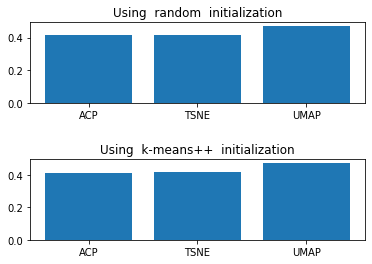

In [12]:
fig, axs = plt.subplots(2)
plt.subplots_adjust(hspace=0.7)

axs[0].bar(methods, nmi_means['random'])
axs[0].set_title('Using  random  initialization')

axs[1].bar(methods, nmi_means['k-means++'])
axs[1].set_title('Using  k-means++  initialization')
plt.show()

We got approximately same results

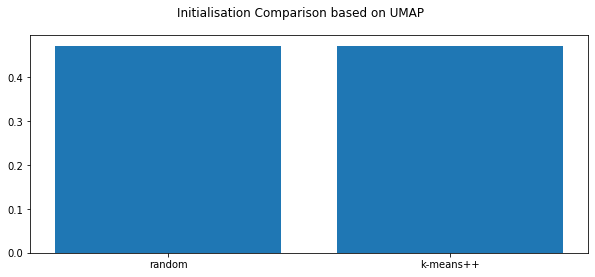

In [13]:
# Compare Algorithms
fig = plt.figure(figsize=(10,4))
fig.suptitle('Initialisation Comparison based on UMAP')
ax = fig.add_subplot(111)
plt.bar(['random', 'k-means++'], [nmi_means['random'][2], nmi_means['k-means++'][2]])
plt.show()

Les résultats avec random initialisation sont un peu meilleur qu’avec kmeans++.

# Trying with different algorithms

In [14]:
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch, MiniBatchKMeans
from sklearn.mixture import GaussianMixture


# Spot Check Algorithms
models = []
models.append(('Kmeans', KMeans(n_clusters=k)))
models.append(('AR', AgglomerativeClustering(n_clusters=k)))
models.append(('GM', GaussianMixture(n_components=k)))
models.append(('SC', SpectralClustering(n_clusters=k)))
models.append(('Birch', Birch(n_clusters=k)))
models.append(('MiniBatchKMeans', MiniBatchKMeans(n_clusters=k)))
              
results = {'Algorithm': [], 'NMI': [], 'ARI': []}

data = red_emb = dim_red(embeddings, 20, 'UMAP')

for name, model in models:
    pred = model.fit_predict(data)
    results['Algorithm'].append(name)
    results['NMI'].append(normalized_mutual_info_score(pred, labels))
    results['ARI'].append(adjusted_rand_score(pred, labels))
    
display(pd.DataFrame.from_dict(results))

,Algorithm,NMI,ARI
0,Kmeans,0.478119,0.295485
1,AR,0.462315,0.263954
2,GM,0.484909,0.305066
3,SC,0.475833,0.200612
4,Birch,0.468285,0.295826
5,MiniBatchKMeans,0.465798,0.286408


On remarque qu'on eu le meilleur resultats en terme de NMI avec l'algorithme KMeans.